To get Polynomial regression to work out, we need the formula for it which is the same as linear regression for but for m degrees
$$ \hat{y_{i}} = \beta_{0}x_{i}^{0} + \beta_{1}x_{i} + \beta_{2}x_{i}^{2} + \ldots + \beta_{m}x_{i}^{m} $$
where $0 \leq i \leq n$. \
Simplifying it
$$ \hat{y_{i}} = \sum_{j=0}^{m}\beta_{j}x_{i}^{j}$$
where $0 \leq j \leq m$. \
Now using the MSE as the cost function
$$MSE = \frac{1}{n} \sum_{i=0}^{n}\left(y_{i}-\hat{y_{i}}\right)^{2}$$
Subbing $\hat{y_{i}}$ into the MSE equation. \
We get
$$MSE = \frac{1}{n} \sum_{i=0}^{n}\left(y_{i}-\left(\sum_{j=0}^{m}\beta_{j}x_{i}^{j}\right)\right)^{2}$$
Taking the derivative with respect to each weight
$$\frac{\partial{MSE}}{\partial{\beta_{k}}} = \frac{-2}{n} \sum_{i=0}^{n} (x_{i}^{k}) \left(y_{i}-\left(\sum_{j=0}^{m}\beta_{j}x_{i}^{j}\right)\right)$$
where $0 \leq k \leq m$ \
The gradient descent for the kth weight (the better weight)
$$\beta_{better\text{ }k} \coloneqq \beta_{k} - \left(L * \frac{\partial{MSE}}{\partial{\beta_{k}}}\right)$$


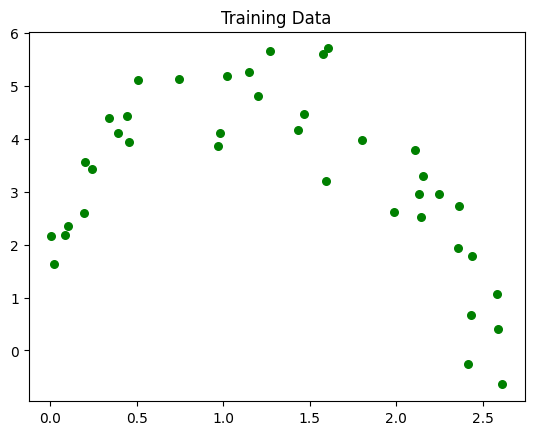

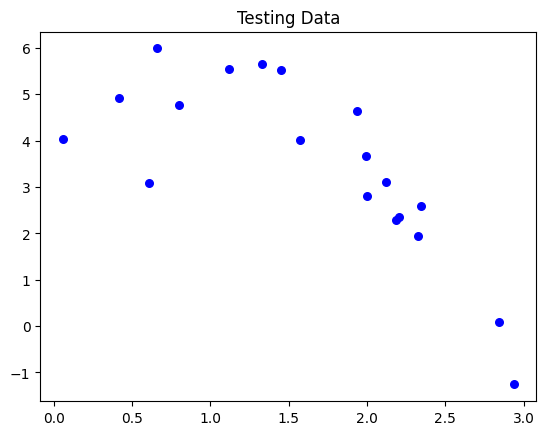

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
    

download = requests.get('https://raw.githubusercontent.com/christam96/Linear-And-Polynomial-Regression-From-Scratch/master/xte.dat').content
X_test = pd.read_csv(io.StringIO(download.decode('utf-8'))).values
download = requests.get('https://raw.githubusercontent.com/christam96/Linear-And-Polynomial-Regression-From-Scratch/master/xtr.dat').content
X_train = pd.read_csv(io.StringIO(download.decode('utf-8'))).values
download = requests.get('https://raw.githubusercontent.com/christam96/Linear-And-Polynomial-Regression-From-Scratch/master/yte.dat').content
y_test = pd.read_csv(io.StringIO(download.decode('utf-8'))).values
download = requests.get('https://raw.githubusercontent.com/christam96/Linear-And-Polynomial-Regression-From-Scratch/master/ytr.dat').content
y_train = pd.read_csv(io.StringIO(download.decode('utf-8'))).values
plt.scatter(X_train, y_train, color = 'g', marker = 'o', s = 30)
plt.title('Training Data')
plt.show()

# # Plot training_data and desired_outputs
plt.scatter(X_test, y_test, color = 'b', marker = 'o', s = 30)
plt.title('Testing Data')
plt.show()

TODO: Figure out method(s) for finding the optimal polynomial order


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
# np.random.seed(30)
# random.seed(30)

train_features = pd.read_csv('xtr.dat',  header = None) 
train_desired_outputs = pd.read_csv('ytr.dat', header = None) 

FileNotFoundError: [Errno 2] No such file or directory: 'xtr.dat'

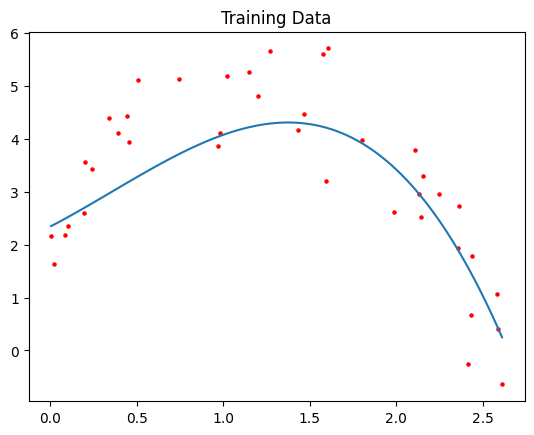

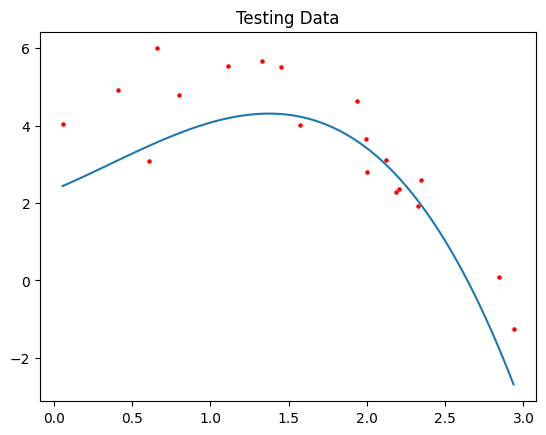

In [106]:
class PolynomialRegression:
    def __init__(self, degree=1, L=0.001):
        self.m = degree
        self.weights = np.array([random.random() for i in range(degree)])
        self.L = L
    def predict(self, x_i: float):
        return sum([self.weights[j] * (x_i ** j) for j in range(self.m)])
    def change_in_MSE(self, X: np.ndarray, y: np.ndarray, k: int, n: int):
      if k < 0 or k > self.m: raise ValueError('index k is out of range')
      return (-2 / n) * (np.sum((X ** k) * (y - self.predict(X))))
    def MSE(self, X: np.ndarray, y: np.ndarray, k: int, n: int):
      if k < 0 or k > self.m: raise ValueError('index k is out of range')
      return (1 / n) * (np.sum((y - self.predict(X)) ** 2))
    def gradient_descent(self, X: np.ndarray, y: np.ndarray, k: int):
        if k < 0 or k > self.m: raise ValueError('index k is out of range')
        n = X.size
        if n != y.size: raise ValueError('Size of y is not the same as X')
        self.weights[k] -= self.L * self.change_in_MSE(X, y, k, n)
model = PolynomialRegression(4)
for l in range(1000):
  for k in range(model.m): 
    model.gradient_descent(X_train, y_train, k)
x_values = np.linspace(min(X_train), max(X_train), 100)
y_pred = model.predict(x_values)
plt.scatter(X_train, y_train, s = 5, color='red')
plt.plot(x_values, y_pred)
plt.title('Training Data')
plt.show()
x_values = np.linspace(min(X_test), max(X_test), 100)
y_pred = model.predict(x_values)
plt.scatter(X_test, y_test, s = 5, color='red')
plt.plot(x_values, y_pred)
plt.title('Testing Data')
plt.show()
